In [2]:
import sys
#stdout = sys.stdout
#reload(sys)
#sys.setdefaultencoding('utf-8')
#sys.stdout = stdout

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import math
import json

# pd.options.mode.chained_assignment = None

from astropy.table import Table, Column
#from string import join
import re,pickle
from sklearn.preprocessing import label_binarize, OneHotEncoder, LabelEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn import metrics
# imports for sklearn transformers
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

# imports for sklearn preprocessing transformers
from sklearn.preprocessing import *

# Feature extraction packages
from sklearn.feature_extraction import *
from sklearn.feature_extraction.text import *
from collections import defaultdict
from sklearn.pipeline import Pipeline, FeatureUnion

import os
#os.environ["ML_SDK_CONF_BUCKET"]="stage-ml-platform-sdk"
#from mlsdk.MLApi import MLApi
# import seaborn as sns
# sns.set_style("dark")
# plt.rcParams['figure.figsize'] = 16, 12

In [3]:
pd.set_option('display.max_columns', 500)

# Data Loading

In [4]:
df_raw_feat_and_label = pd.read_csv('train_sample.csv', delimiter = ',', na_values = ['nan', 'NA', 'null', 'NULL'])

In [5]:
df_raw_feat_and_label.shape

(100000, 8)

In [6]:
df_raw_feat_and_label.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [131]:
df_raw_feat_and_label['is_attributed'].value_counts()/df_raw_feat_and_label.shape[0]


0    0.99773
1    0.00227
Name: is_attributed, dtype: float64

In [8]:
df_raw_feat_and_label.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000,227,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,80350,227,NaN
top,NaN,NaN,NaN,NaN,NaN,2017-11-08 12:01:02,2017-11-07 23:11:40,NaN
freq,NaN,NaN,NaN,NaN,NaN,7,1,NaN
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,NaN,NaN,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,NaN,NaN,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,NaN,NaN,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,NaN,NaN,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,NaN,NaN,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,NaN,NaN,0.000000


In [9]:
df_raw_feat_and_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [7]:
cat=['ip','app','device','os','channel','is_attributed']
for feat in cat:
    df_raw_feat_and_label[feat]=df_raw_feat_and_label[feat].astype('category')
    
df_raw_feat_and_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null category
dtypes: category(6), object(2)
memory usage: 4.2+ MB


In [11]:
df_raw_feat_and_label.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000,100000,100000,100000,100000,100000,227,100000
unique,34857,161,100,130,161,80350,227,2
top,5348,3,1,19,280,2017-11-08 12:01:02,2017-11-07 23:11:40,0
freq,669,18279,94338,23870,8114,7,1,99773


In [8]:
df_raw_feat_and_label['click_time']=pd.to_datetime(df_raw_feat_and_label['click_time'])
df_raw_feat_and_label.info()
df_raw_feat_and_label.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null datetime64[ns]
attributed_time    227 non-null object
is_attributed      100000 non-null category
dtypes: category(6), datetime64[ns](1), object(1)
memory usage: 4.2+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,227,100000.0
unique,34857.0,161.0,100.0,130.0,161.0,80350,227,2.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-08 07:15:56,0.0
freq,669.0,18279.0,94338.0,23870.0,8114.0,7,1,99773.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN


In [9]:
#get weekday part of day from click time
import time
import datetime as dt
from datetime import date
#df_raw_feat_and_label['click_hour']=df_raw_feat_and_label['click_time'].dt.hour 
#df_raw_feat_and_label['click_time'].dt.weekday
labels=[1,2,3,4,5,6]
df_raw_feat_and_label['click_part_of_day']=pd.cut(df_raw_feat_and_label['click_time'].dt.hour , bins=6, labels=labels)
df_raw_feat_and_label['click_weekday']=df_raw_feat_and_label['click_time'].dt.weekday

In [10]:
df_raw_feat_and_label.describe(include='all')
df_raw_feat_and_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
ip                   100000 non-null category
app                  100000 non-null category
device               100000 non-null category
os                   100000 non-null category
channel              100000 non-null category
click_time           100000 non-null datetime64[ns]
attributed_time      227 non-null object
is_attributed        100000 non-null category
click_part_of_day    100000 non-null category
click_weekday        100000 non-null int64
dtypes: category(7), datetime64[ns](1), int64(1), object(1)
memory usage: 5.1+ MB


In [11]:
df_raw_feat_and_label['click_weekday']=df_raw_feat_and_label['click_weekday'].astype('category')
df_raw_feat_and_label.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_weekday
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,227,100000.0,100000.0,100000.0
unique,34857.0,161.0,100.0,130.0,161.0,80350,227,2.0,6.0,4.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-08 07:15:56,0.0,2.0,2.0
freq,669.0,18279.0,94338.0,23870.0,8114.0,7,1,99773.0,21607.0,34035.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN,NaN,NaN


In [16]:
df_raw_feat_and_label['click_time'].dt.date.unique()
# is weekend is of no use

array([datetime.date(2017, 11, 7), datetime.date(2017, 11, 9),
       datetime.date(2017, 11, 8), datetime.date(2017, 11, 6)], dtype=object)

In [35]:
pd.crosstab(df_raw_feat_and_label.app,df_raw_feat_and_label.is_attributed)

KeyError: -1

In [54]:
pd.crosstab(df_raw_feat_and_label.device,df_raw_feat_and_label.is_attributed)

is_attributed,0,1
device,,
0,489,52
1,94192,146
2,4343,2
4,2,1
5,7,0
6,7,1
7,2,0
9,1,0
11,1,0


In [18]:
pd.crosstab(df_raw_feat_and_label.channel,df_raw_feat_and_label.is_attributed)

is_attributed,0,1
channel,,
3,486,2
4,1,0
5,2,5
13,67,0
15,2,0
17,115,0
18,25,0
19,678,0
21,161,19


In [33]:
df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')[(df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')['counts']==0) & (df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')['is_attributed']==1)]

,app,is_attributed,counts


In [34]:
df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')

,app,is_attributed,counts
0,1,0,3135
1,2,0,11737
2,3,0,18275
3,3,1,4
4,4,0,58
5,5,0,174
6,5,1,14
7,6,0,1303
8,7,0,981
9,8,0,2000


In [36]:
df_raw_feat_and_label.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_is_weekend
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,3,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,4,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,5,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,3,0


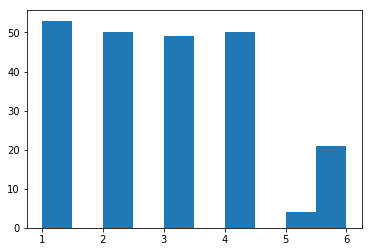

In [43]:
from matplotlib import pyplot
plt.hist(df_raw_feat_and_label['click_part_of_day'][df_raw_feat_and_label['is_attributed']==1])
#plt.hist(df_raw_feat_and_label['is_attributed'])
plt.show()

In [44]:
df_raw_feat_and_label.groupby(['click_part_of_day','is_attributed']).size().reset_index(name='counts')

,click_part_of_day,is_attributed,counts
0,1,0,21105
1,1,1,53
2,2,0,21557
3,2,1,50
4,3,0,20247
5,3,1,49
6,4,0,21413
7,4,1,50
8,5,0,8037
9,5,1,4


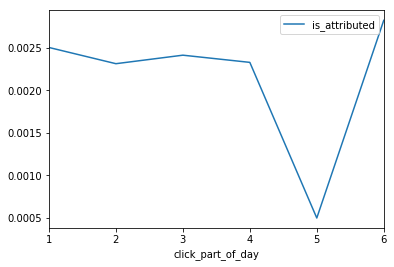

In [12]:

df_raw_feat_and_label['is_attributed']=df_raw_feat_and_label['is_attributed'].astype('int64')
df_raw_feat_and_label[['click_part_of_day','is_attributed']].groupby('click_part_of_day').mean().plot()

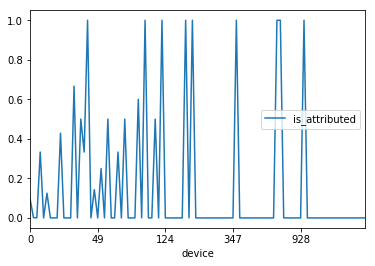

In [137]:
df_raw_feat_and_label[['device','is_attributed']].groupby('device').mean().plot()

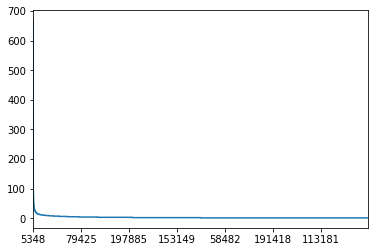

In [415]:
df_raw_feat_and_label['ip'].value_counts().plot()

In [216]:
app_prcnt=pd.DataFrame(df_raw_feat_and_label['app'].value_counts()/df_raw_feat_and_label.shape[0])
type(app_prcnt)
app_prcnt=app_prcnt.reset_index()

In [228]:
app_to_be_bucketed=pd.DataFrame(app_prcnt[app_prcnt['app']<0.001]['index'])
app_to_be_bucketed['app_new']='less_app'
app_to_be_bucketed.columns=['app','app_new']
app_to_be_bucketed.describe()
app_to_be_bucketed.head()

,app,app_new
31,150,less_app
32,4,less_app
33,47,less_app
34,56,less_app
35,35,less_app


In [222]:
type(app_to_be_bucketed)

pandas.core.series.Series

In [3]:
class MissingValueImputerWithValue(BaseEstimator, TransformerMixin):
     
    def __init__(self, value = 0):
        self.value = value
        
    def transform(self, X):
        return X.fillna(self.value) 
   
    def fit(self, X, y=None):
        return self
    
    
class DFSubsetSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        self.cols = cols
        
    def transform(self, X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class CombineTail(BaseEstimator, TransformerMixin):
    def __init__(self, a,b):
        self.a=a
        self.b=b
        
    def fit(self,x,y=None):
        self.q=pd.DataFrame(x[self.a].value_counts()/x.shape[0]).reset_index()
        #r=1/(x[self.a].nunique()*5)
        self.q[self.b]=self.q.apply(lambda x: 'less_'+self.a if x[self.a]<0.001 else x['index'],axis=1)
        #self.y=pd.DataFrame(q[q[self.a]<0.001]['index'])
        #self.y[self.b]='less_'+ self.a
        #self.y.columns=[self.a,self.b]
        del self.q[self.a]
        self.q.columns=[self.a,self.b]
        return self
    
    def transform(self,x):
        self.x_tmp=pd.merge(x, self.q, how='left', on=self.a)
        #self. x_tmp[self.b]=self.x_tmp[self.b].fillna(self.x_tmp[self.a])
        self. x_tmp[self.b]=self.x_tmp[self.b].fillna('less_'+self.a)
        self.x_tmp[self.a]=self.x_tmp[self.b]
        self.x_tmp=self.x_tmp.drop(self.b,axis=1)
        x=pd.DataFrame(self.x_tmp)
        x[self.a]=x[self.a].astype('str')
        return x
        
        
        
        
        
        
        
       
        
    

class CatToOnehot(BaseEstimator, TransformerMixin):
    
    def __init__(self, col=None):
        self.lenc = LabelEncoder()
        self.ohenc = OneHotEncoder()
        self.col = col
        
    def fit(self, s, y=None):
        self.lenc.fit(s)
        self.derived_feat_name = [self.col+"_"+str(l) for l in list(self.lenc.classes_)]
        x_tmp = np.array(self.lenc.transform(s), ndmin = 2).T
        self.ohenc.fit(x_tmp)
        return self

    def transform(self, s):
        x_tmp = np.array(self.lenc.transform(s), ndmin = 2).T
        return self.ohenc.transform(x_tmp)
    



In [446]:
del x
del df_test
del df_train

In [169]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb

learner = LogisticRegression()
#learner2 = RandomForestClassifier(n_jobs=-1,random_state=0,verbose=1,n_estimators=200)
#learner3 = LogisticRegression(n_jobs=-1)

#learner = VotingClassifier([('lr1',learner1),('lr2',learner2),('lr3',learner3)],voting='soft')
#from sklearn.linear_model import LogisticRegression

# Train test split
df_train, df_test, y_train, y_test = model_selection.train_test_split(df_raw_feat_and_label, df_raw_feat_and_label['is_attributed'], test_size = 0.0001, random_state=12, stratify = df_raw_feat_and_label['is_attributed'])

In [170]:
df_train.shape, df_test.shape,y_train.shape, y_test.shape

((99990, 10), (10, 10), (99990,), (10,))

In [172]:
q=pd.DataFrame(df_train['app'].value_counts()/df_train.shape[0]).reset_index()
q.head()

,index,app
0,3,0.182798
1,12,0.131953
2,2,0.117372
3,9,0.089919
4,15,0.085949


In [175]:
q['app_new']=q.apply(lambda x: 'less_app' if x['app']<0.001 else x['index'], axis=1)
q.head()

,index,app,app_new
0,3,0.182798,3
1,12,0.131953,12
2,2,0.117372,2
3,9,0.089919,9
4,15,0.085949,15


In [181]:
a=['app','device','ip','os','channel','click_part_of_day','click_weekday']
b=['app_new','device_new','ip_new','os_new','channel_new','click_part_of_day_new','click_weekday_new']
for i in range(7):
    a[i]=CombineTail(a[i],b[i])
    a[i].fit(df_train)
    df_train=a[i].transform(df_train)

In [182]:
df_train.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_weekday
count,99990,99990,99990,99990,99990,99990,227,99990.000000,99990,99990
unique,24,32,6,48,94,80342,227,NaN,6,4
top,less_ip,3,1,19,280,2017-11-08 12:01:02,2017-11-08 07:15:56,NaN,2,2
freq,94966,18278,94329,23867,8113,7,1,NaN,21605,34031
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002270,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047593,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [183]:
transformer_list=[]
a=['app','device','os','ip','channel','click_part_of_day','click_weekday']
b=['app_new','device_new','os_new','ip_new','channel_new','click_part_of_day_new','click_weekday_new']
for i in range(7):
    transformer_list.append((a[i],Pipeline(
        [
            ('Selector' , DFSubsetSelector([a[i]])),( a[i],CombineTail(a[i],b[i])),('OneHot' , CatToOnehot(a[i])),
        ])))
    
    

all_feature_extractor_preprocessor=FeatureUnion(transformer_list=transformer_list)
#('OneHot' , CatToOnehot(a[i])),

In [32]:
print(all_feature_extractor_preprocessor)

FeatureUnion(n_jobs=1,
       transformer_list=[('app', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['app'])), ('app', CombineTail(a='app', b='app_new')), ('OneHot', CatToOnehot(col='app'))])), ('device', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['device'])), ('device', Combin...lick_part_of_day', b='click_part_of_day_new')), ('OneHot', CatToOnehot(col='click_part_of_day'))]))],
       transformer_weights=None)


In [33]:
print(transformer_list)

[('app', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['app'])), ('app', CombineTail(a='app', b='app_new')), ('OneHot', CatToOnehot(col='app'))])), ('device', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['device'])), ('device', CombineTail(a='device', b='device_new')), ('OneHot', CatToOnehot(col='device'))])), ('ip', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['ip'])), ('ip', CombineTail(a='ip', b='ip_new')), ('OneHot', CatToOnehot(col='ip'))])), ('os', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['os'])), ('os', CombineTail(a='os', b='os_new')), ('OneHot', CatToOnehot(col='os'))])), ('channel', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['channel'])), ('channel', CombineTail(a='channel', b='channel_new')), ('OneHot', CatToOnehot(col='channel'))])), ('click_part_of_day', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['click_part_of_day']))

In [60]:
df_train.shape, df_test.shape,y_train.shape, y_test.shape

((99990, 10), (10, 10), (99990,), (10,))

In [61]:
df_train['is_attributed'].value_counts()

0    99763
1      227
Name: is_attributed, dtype: int64

In [36]:
df_test['is_attributed'].value_counts()

0    10
Name: is_attributed, dtype: int64

In [184]:
all_feature_extractor_preprocessor.fit(df_train)
X_train=all_feature_extractor_preprocessor.transform(df_train)
X_test=all_feature_extractor_preprocessor.transform(df_test)


C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label

ValueError: y contains new labels: ['less_click_part_of_day']

In [85]:
X_train.shape

(99990, 214)

In [86]:
print(X_train.shape,X_test.shape)

(99990, 214) (10, 214)


In [65]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [87]:
learner.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
y_train_pred=learner.predict(X_train)
print(metrics.classification_report(y_train,y_train_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     99763
          1       0.89      0.04      0.07       227

avg / total       1.00      1.00      1.00     99990



In [89]:
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)

[[99762     1]
 [  219     8]]


In [96]:
rf=RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=100)


In [97]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

[[99752    11]
 [   91   136]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     99763
          1       0.93      0.60      0.73       227

avg / total       1.00      1.00      1.00     99990

0.799504340706


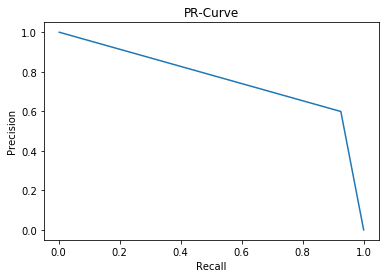

In [98]:
y_train_pred=rf.predict(X_train)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred)
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
print(metrics.roc_auc_score(y_train,y_train_pred))

# Main train data load and manipulation

In [4]:
df=pd.read_csv('train.csv')

In [183]:
df_sample=df.sample(100000)

In [184]:
df_sample.shape

(100000, 8)

In [5]:
df['is_attributed'].value_counts()/df.shape[0]

0    0.997529
1    0.002471
Name: is_attributed, dtype: float64

In [11]:
df=pd.concat([df[(df['is_attributed']==0)].sample(frac=0.07),df[(df['is_attributed']==1)]])


In [7]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
95290462,109098,13,1,19,477,2017-11-08 08:03:28,NaN,0
113578327,101250,12,1,13,259,2017-11-08 13:35:27,NaN,0
79771451,38576,9,1,19,466,2017-11-08 03:12:15,NaN,0
63358478,114276,21,1,13,128,2017-11-07 18:04:28,NaN,0
165127562,42204,25,1,8,259,2017-11-09 10:02:52,NaN,0


In [12]:
df['is_attributed'].value_counts()/df.shape[0]

1    0.876188
0    0.123812
Name: is_attributed, dtype: float64

In [204]:
df.shape

(22590491, 10)

In [205]:
df.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_weekday
count,22590491.0,22590491.0,22590491.0,22590491.0,22590491.0,22590491,456846,2.259049e+07,22590491.0,22590491.0
unique,272440.0,500.0,2294.0,414.0,186.0,259260,182057,NaN,6.0,4.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-09 12:00:11,2017-11-08 14:16:29,NaN,2.0,2.0
freq,150602.0,4076650.0,21189987.0,5372266.0,1809322.0,215,14,NaN,4895190.0,7687862.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 14:33:34,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 16:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022293e-02,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.407621e-01,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN


In [13]:
cat=['ip','app','device','os','channel']
for feat in cat:
    df[feat]=df[feat].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521402 entries, 92030901 to 184882311
Data columns (total 8 columns):
ip                 521402 non-null category
app                521402 non-null category
device             521402 non-null category
os                 521402 non-null category
channel            521402 non-null category
click_time         521402 non-null object
attributed_time    456846 non-null object
is_attributed      521402 non-null int64
dtypes: category(5), int64(1), object(2)
memory usage: 33.9+ MB


In [14]:
df.shape

(521402, 8)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22590491 entries, 139240568 to 184882311
Data columns (total 8 columns):
ip                 category
app                category
device             category
os                 category
channel            category
click_time         object
attributed_time    object
is_attributed      int64
dtypes: category(5), int64(1), object(2)
memory usage: 960.2+ MB


In [15]:
df['click_time']=pd.to_datetime(df['click_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521402 entries, 92030901 to 184882311
Data columns (total 8 columns):
ip                 521402 non-null category
app                521402 non-null category
device             521402 non-null category
os                 521402 non-null category
channel            521402 non-null category
click_time         521402 non-null datetime64[ns]
attributed_time    456846 non-null object
is_attributed      521402 non-null int64
dtypes: category(5), datetime64[ns](1), int64(1), object(1)
memory usage: 33.9+ MB


In [16]:
#get weekday part of day from click time
import time
import datetime as dt
from datetime import date
#df_raw_feat_and_label['click_hour']=df_raw_feat_and_label['click_time'].dt.hour 
#df_raw_feat_and_label['click_time'].dt.weekday
labels=[1,2,3,4,5,6]
df['click_part_of_day']=pd.cut(df['click_time'].dt.hour , bins=6, labels=labels)
df['click_weekday']=df['click_time'].dt.weekday.astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521402 entries, 92030901 to 184882311
Data columns (total 10 columns):
ip                   521402 non-null category
app                  521402 non-null category
device               521402 non-null category
os                   521402 non-null category
channel              521402 non-null category
click_time           521402 non-null datetime64[ns]
attributed_time      456846 non-null object
is_attributed        521402 non-null int64
click_part_of_day    521402 non-null category
click_weekday        521402 non-null category
dtypes: category(7), datetime64[ns](1), int64(1), object(1)
memory usage: 34.9+ MB


In [18]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
#import xgboost as xgb

log = LogisticRegression()
rf= RandomForestClassifier(n_jobs=-1,random_state=0,verbose=1,n_estimators=100,max_depth=4)
#learner3 = LogisticRegression(n_jobs=-1)
#xgb = xgb.XGBClassifier(nthread=-1,max_depth=4)
#clf=RandomForestClassifier(n_jobs=-1)
gb=GradientBoostingClassifier(max_depth=4)
dt = tree.DecisionTreeClassifier(max_depth=5)

#learner = VotingClassifier([('lr1',learner1),('lr2',learner2),('lr3',learner3)],voting='soft')
#from sklearn.linear_model import LogisticRegression

# Train test split
df_train, df_test, y_train, y_test = model_selection.train_test_split(df, df['is_attributed'], test_size = 0.2, random_state=12, stratify = df['is_attributed'])

In [19]:
df_train.shape

(417121, 10)

In [20]:
df_test.shape

(104281, 10)

In [21]:
y_train.shape

(417121,)

In [22]:
df_test.shape

(104281, 10)

In [23]:
transformer_list=[]
a=['app','device','ip','os','channel','click_part_of_day']
b=['app_new','device_new','ip_new','os_new','channel_new','click_part_of_day_new']
for i in range(6):
    transformer_list.append((a[i],Pipeline(
        [
            ('Selector' , DFSubsetSelector([a[i]])),( a[i],CombineTail(a[i],b[i])),('OneHot' , CatToOnehot(a[i])),
        ])))
    
    

all_feature_extractor_preprocessor=FeatureUnion(transformer_list=transformer_list)

In [24]:
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_weekday
119134544,69975,1,2,13,134,2017-11-08 15:06:09,NaN,0,4,2
181789512,24848,27,1,53,153,2017-11-09 14:58:20,NaN,0,4,3
88958499,69936,19,0,0,347,2017-11-08 05:59:52,2017-11-08 11:12:24,1,2,2
151354364,334584,10,1,11,113,2017-11-09 05:42:18,2017-11-09 05:42:45,1,2,3
60663795,268319,19,0,29,213,2017-11-07 16:20:40,2017-11-07 16:22:09,1,5,1


In [25]:
df_train.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_weekday
count,417121.0,417121.0,417121.0,417121.0,417121.0,417121,365476,417121.000000,417121.0,417121.0
unique,207518.0,269.0,1710.0,145.0,177.0,186396,168330,NaN,6.0,4.0
top,5348.0,19.0,1.0,19.0,213.0,2017-11-08 11:23:19,2017-11-08 13:45:07,NaN,1.0,2.0
freq,2223.0,105991.0,294206.0,76214.0,106547.0,13,13,NaN,97410.0,140165.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 15:41:07,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:53,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.876187,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329368,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [208]:
df_train['click_weekday'].unique()

[2, 1, 3, 0]
Categories (4, int64): [2, 1, 3, 0]

In [209]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18072392 entries, 85702503 to 30146959
Data columns (total 10 columns):
ip                   category
app                  category
device               category
os                   category
channel              category
click_time           datetime64[ns]
attributed_time      object
is_attributed        int64
click_part_of_day    category
click_weekday        category
dtypes: category(7), datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ GB


In [26]:
all_feature_extractor_preprocessor.fit(df_train)


C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label

FeatureUnion(n_jobs=1,
       transformer_list=[('app', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['app'])), ('app', CombineTail(a='app', b='app_new')), ('OneHot', CatToOnehot(col='app'))])), ('device', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['device'])), ('device', Combin...lick_part_of_day', b='click_part_of_day_new')), ('OneHot', CatToOnehot(col='click_part_of_day'))]))],
       transformer_weights=None)

In [27]:
X_train=all_feature_extractor_preprocessor.transform(df_train)


C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
X_test=all_feature_extractor_preprocessor.transform(df_test)

C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
type(X_train),type(X_test)

(scipy.sparse.csr.csr_matrix, scipy.sparse.csr.csr_matrix)

In [30]:
X_train.shape

(417121, 231)

In [31]:
X_test.shape

(104281, 231)

In [ ]:
#deleted unwanted files
del df
del df_sample
del df_raw_feat_and_label
del df_train
del df_test
del X_train_sample

# Simple Logistic Regression

In [32]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_train_pred=log.predict(X_train)
#y_test_pred=log.predict(X_test)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))



[[ 34241  17404]
 [ 14411 351065]]
             precision    recall  f1-score   support

          0       0.70      0.66      0.68     51645
          1       0.95      0.96      0.96    365476

avg / total       0.92      0.92      0.92    417121



0.811788148872


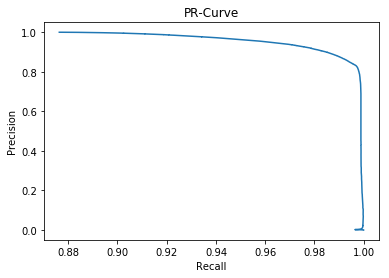

In [34]:
y_train_pred_prob=log.predict_proba(X_train)
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
print(metrics.roc_auc_score(y_train,y_train_pred))

In [36]:
max(y_train_pred_prob[:,1])

0.99998494069567745

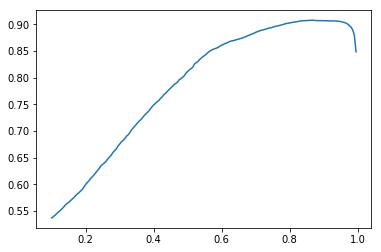

optimal_threshold= 0.865 for which AUC= 0.907992980339


In [39]:
auc=[]
thres=[]

for cutoff in np.arange(0.1,1,0.005):
    y_train_pred=(y_train_pred_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_train,y_train_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

In [40]:
y_test_pred=log.predict(X_test)
confusion_matrix_test=confusion_matrix(y_test,y_test_pred)
print(confusion_matrix_test)
print(metrics.classification_report(y_test,y_test_pred))


[[ 8590  4321]
 [ 3620 87750]]
             precision    recall  f1-score   support

          0       0.70      0.67      0.68     12911
          1       0.95      0.96      0.96     91370

avg / total       0.92      0.92      0.92    104281



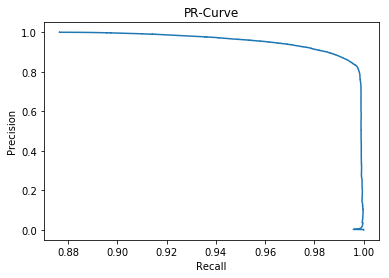

0.812852505599


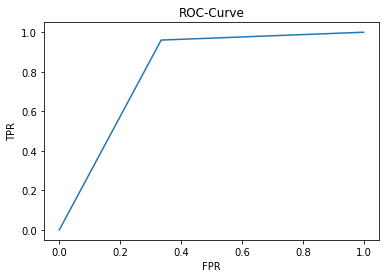

In [41]:
y_test_pred_prob=log.predict_proba(X_test)
prec,rec,thres=metrics.precision_recall_curve(y_test,y_test_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_test,y_test_pred))
tpr,fpr,thresh=metrics.roc_curve(y_test,y_test_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

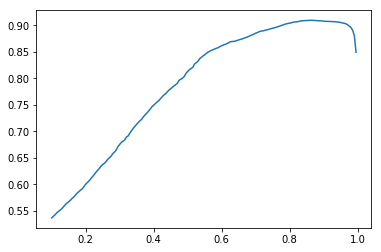

optimal_threshold= 0.865 for which AUC= 0.909751172623


In [42]:
auc=[]
thres=[]

for cutoff in np.arange(0.1,1,0.005):
    y_test_pred=(y_test_pred_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

# Random Forest

In [43]:
rf= RandomForestClassifier(n_jobs=-1,random_state=0,verbose=1,n_estimators=100,max_depth=5)

In [44]:
X_train.shape,y_train.shape

((417121, 231), (417121,))

In [45]:
rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    6.8s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    2.1s finished


[[     0  51645]
 [     0 365476]]


C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00     51645
          1       0.88      1.00      0.93    365476

avg / total       0.77      0.88      0.82    417121



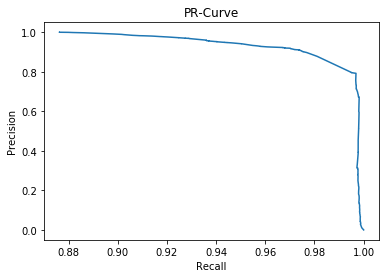

0.5


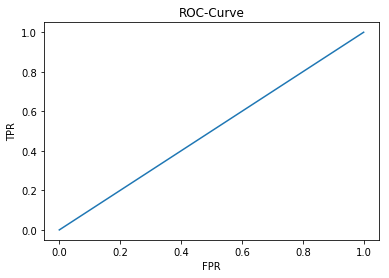

In [46]:
y_train_pred_prob=rf.predict_proba(X_train)
y_train_pred=rf.predict(X_train)
#y_test_pred=log.predict(X_test)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))


prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_train,y_train_pred))
tpr,fpr,thresh=metrics.roc_curve(y_train,y_train_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()





[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.4s finished


[[    0 12911]
 [    0 91370]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     12911
          1       0.88      1.00      0.93     91370

avg / total       0.77      0.88      0.82    104281



C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.4s finished


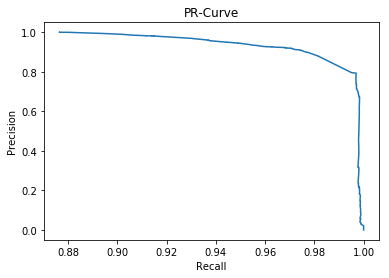

0.5


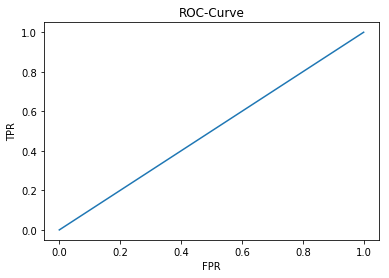

In [47]:
y_test_pred=rf.predict(X_test)
confusion_matrix_test=confusion_matrix(y_test,y_test_pred)
print(confusion_matrix_test)
print(metrics.classification_report(y_test,y_test_pred))


y_test_pred_prob=rf.predict_proba(X_test)
prec,rec,thres=metrics.precision_recall_curve(y_test,y_test_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_test,y_test_pred))
tpr,fpr,thresh=metrics.roc_curve(y_test,y_test_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

In [49]:
max(y_test_pred_prob[:,1])

0.9719092986202168

In [50]:
print(metrics.roc_auc_score(y_test,y_test_pred))

0.5


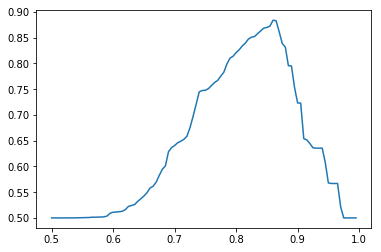

optimal_threshold= 0.86 for which AUC= 0.883843729011


In [51]:
auc=[]
thres=[]

for cutoff in np.arange(0.5,1,0.005):
    y_train_pred=(y_train_pred_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_train,y_train_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

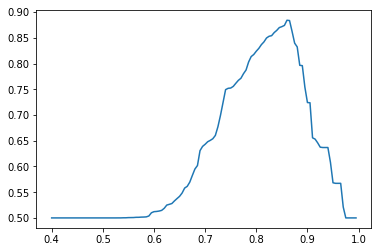

optimal_threshold= 0.86 for which AUC= 0.884218881004


In [52]:
auc=[]
thres=[]

for cutoff in np.arange(0.4,1,0.005):
    y_test_pred=(y_test_pred_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

In [396]:
# to release memory
import gc

gc.collect()

0

In [395]:
import psutil
psutil.virtual_memory()

svmem(total=137372446720, available=121624027136, percent=11.5, used=15748419584, free=121624027136)

In [592]:
import sys
for obj in locals().values():
        print(sys.getsizeof(obj) )

57
113
16
16
16
80
80
4848
9320
72
4848
9320
64
56
56
88
24
88
86
92
86
51
1237
80
80
80
80
80
80
80
80
1184
1184
80
80
136
888
1056
1056
1056
1056
80
136
136
136
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
136
1056
136
136
136
136
136
136
136
1056
80
136
136
80
1056
1056
8416
1056
1056
136
136
136
400
1056
1056
80
90
164
76
64
77
884
109
94
2043
77
235
112
102
94
838
211
1357
543
80
56
400
112
123
197
1453
127
128
123
9330
127
9330
112
111
28576
112
110
9114
137
8720
170
171
171
156
150
296
261
351
355
6528
265
296
355
6528
137
8720
127
77
1615238
154
155
112
162
191
80
234
235
151
528
1156
1056
1056
1056
909
2000
1056
1056
1464
80
1056
1464
56
7735478936
1933869752
423
128
56
106
80
230
377
909
106
80
230
422
423
909
106
80
230
425
909
106
80
230
427
909
106
80
230
429
909
106
80
230
106
112
83
112
154
56
379
909
106
80
230
409
909
106
80
230
56
56
62
64
64
66
61
56
61
56
68
67
67
68
63
167
1183384992
263
62
888
69
64
75
82
82
163
295846320
263
89
138
62
888
72
400
74
230


In [599]:
#del app_prcnt
#del app_to_be_bucketed
del y_train_pred
del y_train_pred_prob
del y_test_pred
del y_test_pred_prob

# Decision Tree Model

In [53]:
dt= tree.DecisionTreeClassifier(max_depth=5)


In [54]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
X_train.shape,y_train.shape

((417121, 231), (417121,))

In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [370]:
y_train_pred_prob=dt.predict_proba(X_train)

In [385]:
pd.DataFrame(y_train_pred_prob[:,1]).nunique()

0    29
dtype: int64

In [387]:
max(y_train_pred_prob[:,1])

0.9910945595854922

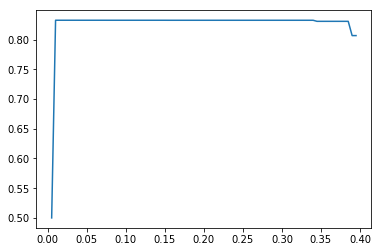

optimal_threshold= 0.01 for which AUC= 0.832526442476


In [391]:
auc=[]
thres=[]

for cutoff in np.arange(0.005,0.4,0.005):
    y_train_pred=(y_train_pred_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_train,y_train_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))


In [57]:
y_train_pred=dt.predict(X_train)
#y_test_pred=log.predict(X_test)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))


[[ 26623  25022]
 [ 15216 350260]]
             precision    recall  f1-score   support

          0       0.64      0.52      0.57     51645
          1       0.93      0.96      0.95    365476

avg / total       0.90      0.90      0.90    417121



0.73693333583


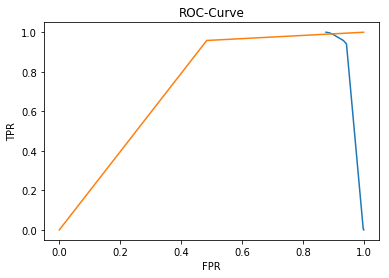

In [58]:
y_train_pred_prob=dt.predict_proba(X_train)
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
print(metrics.roc_auc_score(y_train,y_train_pred))
tpr,fpr,thresh=metrics.roc_curve(y_train,y_train_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

In [59]:
y_test_pred=dt.predict(X_test)
confusion_matrix_test=confusion_matrix(y_test,y_test_pred)
print(confusion_matrix_test)
print(metrics.classification_report(y_test,y_test_pred))


[[ 6802  6109]
 [ 3765 87605]]
             precision    recall  f1-score   support

          0       0.64      0.53      0.58     12911
          1       0.93      0.96      0.95     91370

avg / total       0.90      0.91      0.90    104281



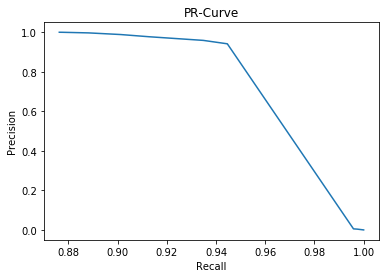

0.742815747605


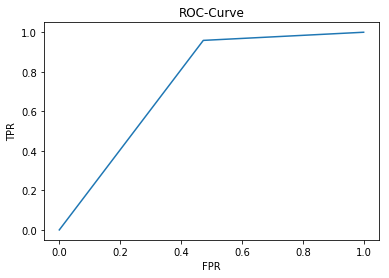

In [60]:
y_test_pred_prob=dt.predict_proba(X_test)
prec,rec,thres=metrics.precision_recall_curve(y_test,y_test_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_test,y_test_pred))
tpr,fpr,thresh=metrics.roc_curve(y_test,y_test_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

In [62]:
min(y_train_pred_prob[:,1])

0.0

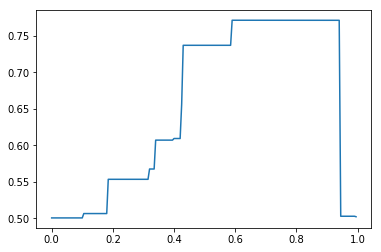

optimal_threshold= 0.59 for which AUC= 0.771256533458


In [63]:
auc=[]
thres=[]

for cutoff in np.arange(0,1,0.005):
    y_train_pred=(y_train_pred_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_train,y_train_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

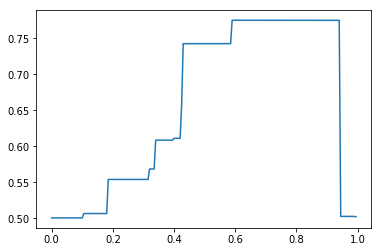

optimal_threshold= 0.59 for which AUC= 0.775374757539


In [64]:
auc=[]
thres=[]

for cutoff in np.arange(0,1,0.005):
    y_test_pred=(y_test_pred_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

# Boosting

In [65]:
#import xgboost as xgb
gb=GradientBoostingClassifier(max_depth=5)
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
from xgboost import XGBClassifier

In [333]:
y_train_pred_prob=gb.predict_proba(X_train)[:,1]

In [335]:
max(y_train_pred_prob)

0.99999657711295598

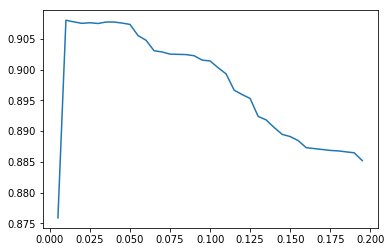

In [337]:
auc=[]
thres=[]

for cutoff in np.arange(0.005,0.2,0.005):
    y_train_pred=(y_train_pred_prob>cutoff).astype('int')
    a=metrics.roc_auc_score(y_train,y_train_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()

In [388]:
thres[auc.index(max(auc))]

0.01

[[ 35056  16589]
 [ 15083 350393]]
             precision    recall  f1-score   support

          0       0.70      0.68      0.69     51645
          1       0.95      0.96      0.96    365476

avg / total       0.92      0.92      0.92    417121



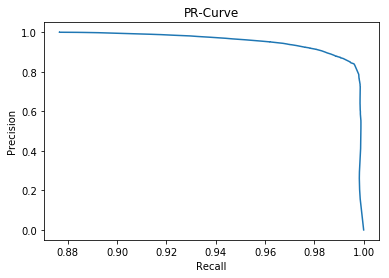

0.818759205513


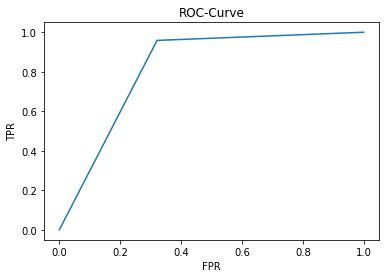

In [66]:
y_train_pred=gb.predict(X_train)
#y_test_pred=log.predict(X_test)

confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))



y_train_pred_prob=gb.predict_proba(X_train)
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_train,y_train_pred))
tpr,fpr,thresh=metrics.roc_curve(y_train,y_train_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()



[[ 8805  4106]
 [ 3801 87569]]
             precision    recall  f1-score   support

          0       0.70      0.68      0.69     12911
          1       0.96      0.96      0.96     91370

avg / total       0.92      0.92      0.92    104281



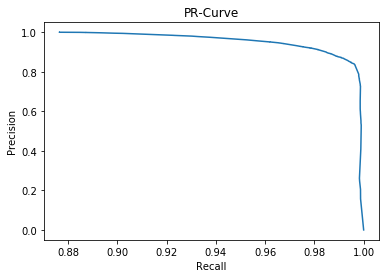

0.820188260768


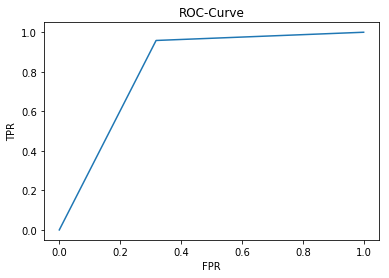

In [67]:
y_test_pred=gb.predict(X_test)
confusion_matrix_test=confusion_matrix(y_test,y_test_pred)
print(confusion_matrix_test)
print(metrics.classification_report(y_test,y_test_pred))


y_test_pred_prob=gb.predict_proba(X_test)
prec,rec,thres=metrics.precision_recall_curve(y_test,y_test_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_test,y_test_pred))
tpr,fpr,thresh=metrics.roc_curve(y_test,y_test_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

In [69]:
min(y_train_pred_prob[:,1])

0.02822473937824729

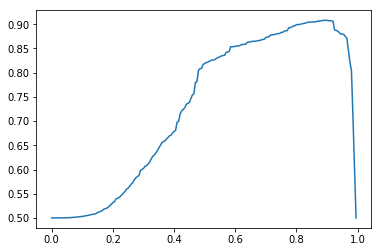

optimal_threshold= 0.895 for which AUC= 0.908350775604


In [70]:
auc=[]
thres=[]

for cutoff in np.arange(0,1,0.005):
    y_train_pred=(y_train_pred_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_train,y_train_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

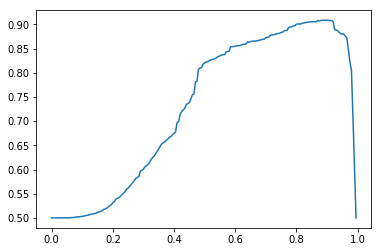

optimal_threshold= 0.9 for which AUC= 0.908491704436


In [71]:
auc=[]
thres=[]

for cutoff in np.arange(0,1,0.005):
    y_test_pred=(y_test_pred_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

# Bagging

In [246]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=dt, n_jobs=-1,n_estimators=100)


In [247]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

[[17623349    83566]
 [  143725   221752]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99  17706915
          1       0.73      0.61      0.66    365477

avg / total       0.99      0.99      0.99  18072392



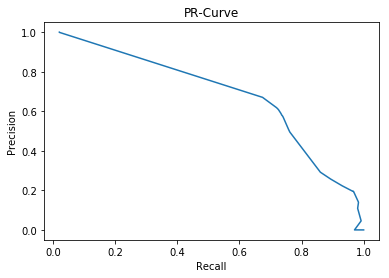

0.801013700108


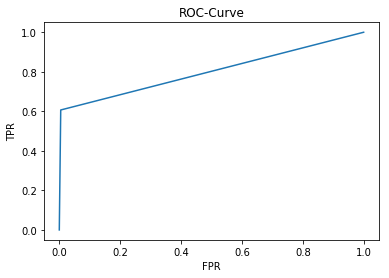

In [248]:
y_train_pred=bg.predict(X_train)
#y_test_pred=log.predict(X_test)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))



y_train_pred_prob=bg.predict_proba(X_train)
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_train,y_train_pred))
tpr,fpr,thresh=metrics.roc_curve(y_train,y_train_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()



[[4405791   20939]
 [  36014   55355]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99   4426730
          1       0.73      0.61      0.66     91369

avg / total       0.99      0.99      0.99   4518099



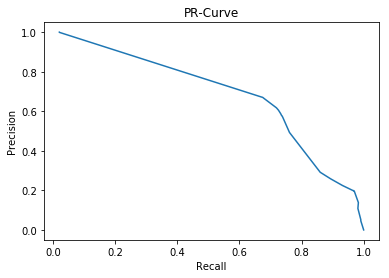

0.800554963526


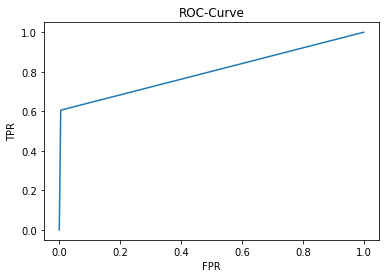

In [250]:
y_test_pred=bg.predict(X_test)
confusion_matrix_test=confusion_matrix(y_test,y_test_pred)
print(confusion_matrix_test)
print(metrics.classification_report(y_test,y_test_pred))


y_test_pred_prob=bg.predict_proba(X_test)
prec,rec,thres=metrics.precision_recall_curve(y_test,y_test_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_test,y_test_pred))
tpr,fpr,thresh=metrics.roc_curve(y_test,y_test_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

# Sample Submission

In [156]:
submission_sample=pd.read_csv('sample_submission.csv')

In [157]:
submission_sample.head()

,click_id,is_attributed
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [158]:
test=pd.read_csv('test.csv')

In [159]:
test.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


In [161]:
test.describe(include='all')

,click_id,ip,app,device,os,channel,click_time
count,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,18790469
unique,NaN,NaN,NaN,NaN,NaN,NaN,21603
top,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 09:00:10
freq,NaN,NaN,NaN,NaN,NaN,NaN,1466
mean,9.395234e+06,6.306921e+04,1.221480e+01,1.730513e+00,1.873312e+01,2.648059e+02,NaN
std,5.424341e+06,3.688597e+04,1.164924e+01,2.597038e+01,1.135059e+01,1.355254e+02,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,4.697617e+06,3.155800e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.350000e+02,NaN
50%,9.395234e+06,6.393600e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.360000e+02,NaN
75%,1.409285e+07,9.531600e+04,1.800000e+01,1.000000e+00,1.900000e+01,4.010000e+02,NaN


In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data columns (total 7 columns):
click_id      int64
ip            int64
app           int64
device        int64
os            int64
channel       int64
click_time    object
dtypes: int64(6), object(1)
memory usage: 1003.5+ MB


In [164]:
cat=['click_id','ip','app','device','os','channel']
for feat in cat:
    test[feat]=test[feat].astype('category')
    
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data columns (total 7 columns):
click_id      category
ip            category
app           category
device        category
os            category
channel       category
click_time    object
dtypes: category(6), object(1)
memory usage: 1.2+ GB


In [165]:
test['click_time']=pd.to_datetime(test['click_time'])


#get weekday part of day from click time
import time
import datetime as dt
from datetime import date
#df_raw_feat_and_label['click_hour']=df_raw_feat_and_label['click_time'].dt.hour 
#df_raw_feat_and_label['click_time'].dt.weekday
labels=[1,2,3,4,5,6]
test['click_part_of_day']=pd.cut(test['click_time'].dt.hour , bins=6, labels=labels)
test['click_weekday']=test['click_time'].dt.weekday.astype('category')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data columns (total 9 columns):
click_id             category
ip                   category
app                  category
device               category
os                   category
channel              category
click_time           datetime64[ns]
click_part_of_day    category
click_weekday        category
dtypes: category(8), datetime64[ns](1)
memory usage: 1.2 GB


In [166]:
test.describe(include='all')

,click_id,ip,app,device,os,channel,click_time,click_part_of_day,click_weekday
count,18790469.0,18790469.0,18790469.0,18790469.0,18790469.0,18790469.0,18790469,18790469.0,18790469.0
unique,18790469.0,93936.0,417.0,1985.0,395.0,178.0,21603,6.0,1.0
top,18790468.0,5348.0,9.0,1.0,19.0,107.0,2017-11-10 09:00:10,1.0,4.0
freq,1.0,182522.0,2872176.0,17360269.0,4334532.0,1214650.0,1466,6202552.0,18790469.0
first,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 04:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 15:00:00,NaN,NaN


In [218]:
X_test_sub=all_feature_extractor_preprocessor.transform(test)

C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [219]:
X_test.shape

(4518099, 212)

In [354]:
X_test_sub.shape

(18790469, 212)

In [223]:
y_test_sub=log.predict(X_test_sub)

In [298]:
y_test_sub_prob=rf.predict_proba(X_test_sub)
y_test_sub=y_test_sub_prob[:,1]>0.03
#gave 0.8895 on submission

[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:  1.8min remaining:   36.9s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:  1.9min finished


In [356]:
y_test_sub_prob=gb.predict_proba(X_test_sub)
y_test_sub=y_test_sub_prob[:,1]>0.01

In [359]:
test['is_attributed']=y_test_sub.astype('int')

In [360]:
test.head()

,click_id,ip,app,device,os,channel,click_time,click_part_of_day,click_weekday,is_attributed
0,0,5744,9,1,3,107,2017-11-10 04:00:00,1,4,0
1,1,119901,9,1,3,466,2017-11-10 04:00:00,1,4,0
2,2,72287,21,1,19,128,2017-11-10 04:00:00,1,4,0
3,3,78477,15,1,13,111,2017-11-10 04:00:00,1,4,0
4,4,123080,12,1,13,328,2017-11-10 04:00:00,1,4,0


In [361]:
test.is_attributed.value_counts()/test.shape[0]

0    0.956774
1    0.043226
Name: is_attributed, dtype: float64

In [362]:
test_submission=test[['click_id','is_attributed']]

In [363]:
test_submission.head()

,click_id,is_attributed
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [364]:
test_submission.to_csv('test_submission.csv',index=False)

In [365]:
test_submission.columns

Index(['click_id', 'is_attributed'], dtype='object')

In [366]:
test_submission.shape

(18790469, 2)